<a href="https://colab.research.google.com/github/evarevolt/Practical-work/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Dataset (completeSpamAssassin.csv) from https://www.kaggle.com/datasets/nitishabharathi/email-spam-dataset/data
data = pd.read_csv('drive/MyDrive/Datasets/spam_dataset.csv')
data.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [ ]:

data['Label'] = data['Label'].replace([0, 1],["non-spam", "spam"])
data.drop(columns=['Unnamed: 0'], inplace=True)
data.drop_duplicates(subset=["Body"], keep="first", inplace=True)
data.sample(5)

,Body,Label
1411,Give me 5 minutes and I will show you how\nto ...,spam
2469,\nSo much for carnivore ;)-- \nGary Lawrence M...,non-spam
5154,"On Mon, 05 Aug 2002 21:39:59 -0400 \nTom Reing...",non-spam
810,Earn the Extra Income That You So Need and Des...,spam
4857,"Yes, the lasat speed basic sucks-ass.com, it w...",non-spam


In [ ]:
data.describe()

,Body,Label
count,5292,5293
unique,5292,2
top,\nSave up to 70% on Life Insurance.\nWhy Spend...,non-spam
freq,1,3914


In [ ]:
import re
def filter_data(message):
    message = str(message).lower() # перевод в строчные буквы
    message = re.findall("[a-z0-9]+", message) # поиск только слов из цифр и букв
    message = " ".join(message) # Соединяем слова обратно

    return message

data["Body"] = data['Body'].apply(filter_data)

In [ ]:
data["Label"].value_counts()

non-spam    3914
spam        1379
Name: Label, dtype: int64

<Axes: ylabel='Label'>

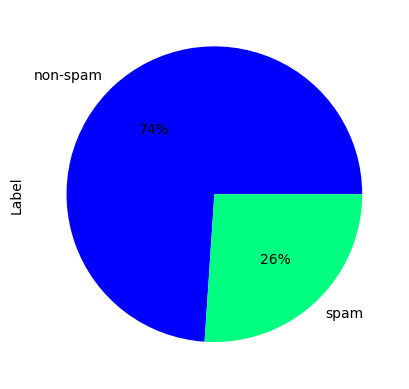

In [ ]:
data["Label"].value_counts().plot(kind='pie', autopct='%1.0f%%', colormap="winter")

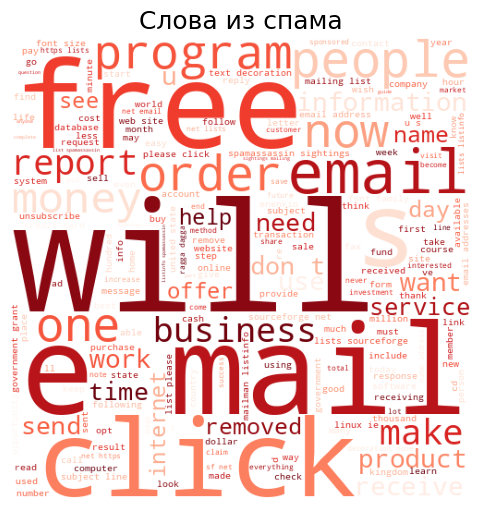

In [ ]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_wordcloud(df, title, colormap=None):
  text = " ".join(df["Body"].astype(str).tolist())

  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white", width=500,
                        height=500, colormap=colormap).generate(text)

  plt.figure(figsize=(6, 6))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.title(title, fontsize=18)
  plt.show()

spam_data = data[data["Label"] == "spam"].copy()
non_spam_data = data[data["Label"] == "non-spam"].copy()

generate_wordcloud(spam_data, title="Слова из спама", colormap="Reds")

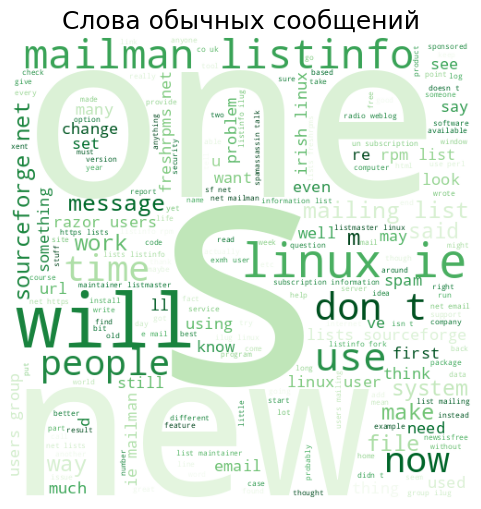

In [ ]:
generate_wordcloud(non_spam_data, title="Слова обычных сообщений", colormap="Greens")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data["Body"], data["Label"], test_size=0.25, random_state=57)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english", lowercase=True)
# трансформация векторов TFIDF
train_transformed = vectorizer.fit_transform(X_train)
test_transformed = vectorizer.transform(X_test)

In [ ]:
from sklearn.svm import LinearSVC

# тренировка модели
model = LinearSVC()
model.fit(train_transformed, y_train)
predicted = model.predict(test_transformed)

In [ ]:
from sklearn.metrics import  accuracy_score, classification_report

print("Отчет:")
print(classification_report(y_test, predicted))

print(f"Точность классификации: {accuracy_score(y_test, predicted):.2%}")

Отчет:
              precision    recall  f1-score   support

    non-spam       0.98      0.99      0.99       965
        spam       0.98      0.94      0.96       359

    accuracy                           0.98      1324
   macro avg       0.98      0.97      0.97      1324
weighted avg       0.98      0.98      0.98      1324

Точность классификации: 98.04%


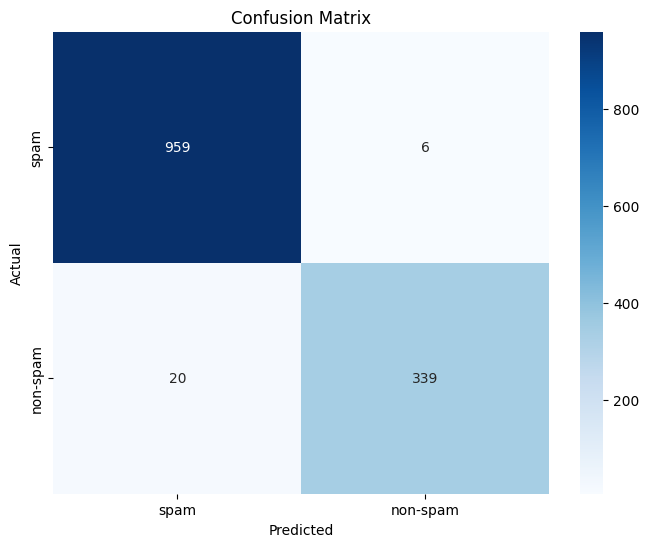

In [ ]:
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted)
classes = data['Label'].unique()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Тестирование модели
test_messages = ["You have won 10000000 yuan, please provide us with your account information so we can transfer the money to your account.",
                 "Dear Sir or Madam, please return as soon as possible."]
test_messages = list(map(filter_data, test_messages))

print(test_messages)

message_vector = vectorizer.transform(test_messages)
category = model.predict(message_vector)
print(f"Результат: {category}.")

['you have won 10000000 yuan please provide us with your account information so we can transfer the money to your account', 'dear sir or madam please return as soon as possible']
Результат: ['spam' 'spam'].
